### 1. Trend of International Destination
- Domestic and international over the time distribution
Methodology:
Calculate passenger count of domestic and international as percentage per year

- Where do they have been traveled most? 
Methodology:
In international regions, find out top 5 regions by summing passenger count

- Is there difference of destinations per month?
Methodology:
Average monthly passenger count for top 5 regions

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.ticker import PercentFormatter, FuncFormatter
import matplotlib.ticker as ticker

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\10_SFO_airtraffic\workingsheet.csv')

sns.set_style('ticks')

df['date']=pd.to_datetime(df['Activity Period Start Date'])
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

- Domestic and international over the time distribution
Methodology:
Calculate passenger count of domestic and international as percentage per year

Created new Dataframe `df_national` to calculate distribution of international and domestic passenger

In [2]:
df_national=df.pivot_table(index='year',columns='GEO Summary', values='Passenger Count', aggfunc='sum')

In [3]:
df_national_perc = df_national.copy()

Calculate percentage

In [4]:
df_national_perc['sum']= df_national_perc.sum(axis=1)
df_national_perc['Domestic']=df_national_perc['Domestic'].div(df_national_perc['sum']/100)
df_national_perc['International']=df_national_perc['International'].div(df_national_perc['sum']/100)
df_national_perc.drop('sum',axis=1,inplace=True)

Visualize using horizontal stacked bar chart to see yearly change of distribution

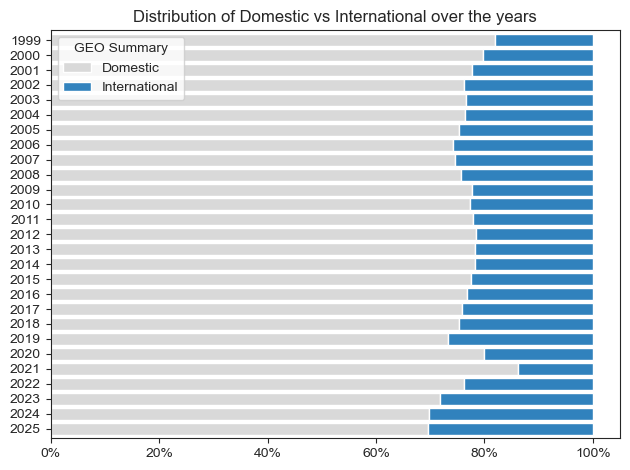

In [ ]:
df_national_perc.plot(kind='barh',stacked=True,width=0.8,colormap='tab20c_r')
plt.gca().invert_yaxis()
plt.title('Distribution of Domestic vs International over the years')
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()


- International passenger has been constantly increased since 1999, and more than 25% of passengers in SFO fly international.
  

- Where do they have been traveled most? 
Methodology:
In international regions, find out top 5 regions by summing passenger count

Created new Dataframe `df_region` with total count of passengers per each month 

In [5]:
df_region =df.pivot_table(index='date',values='Passenger Count', columns='GEO Region', aggfunc='sum')

To limit top 5 countries, sort values and filtered to international region

In [6]:
df_region.loc['sum',:]=df_region.sum(axis=0)
df_region = df_region.T.sort_values(by='sum',ascending=False).T
df_region.drop('sum',axis=0,inplace=True)

In [115]:
df_plot = df_region.iloc[:,1:6]


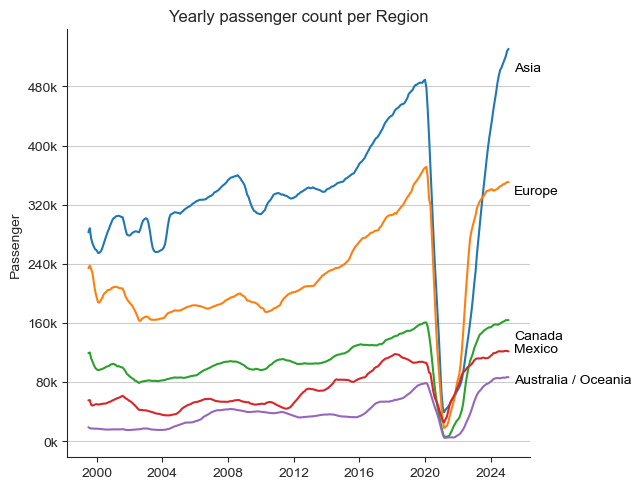

In [119]:
df_plot.rolling(window=12, min_periods=1).mean().plot(figsize=(6.5,5))
for i in range(1,6):
    plt.text(20240, df_region.iloc[-11, i], df_region.columns[i], color='black')
plt.legend().remove()
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(8))
plt.xticks(rotation=0 , ha='center') 
plt.grid(axis='y')
plt.xlabel('')
plt.ylabel('Passenger')
plt.title('Yearly passenger count per Region')
sns.despine()
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.tight_layout()

For international flight, passenger has been growing constantly except during the pandemic.
Especially, Asia passenger has passed before pandemic.

- Is there difference of destinations per month?
Methodology:
Average monthly passenger count for top 5 regions

Created new Dataframe with average passenger count per month by Region

In [10]:
df_monthly = df.pivot_table(index='month', columns='GEO Region', values='Passenger Count',aggfunc='mean')

To limit top 5 countries, sort values

In [ ]:
df_monthly_top=df_monthly.copy()
df_monthly_top.loc['sum']= df_monthly_top.sum(axis=0)
df_monthly_top = df_monthly_top.T.sort_values(by='sum',ascending=False).T
df_monthly_top = df_monthly_top.drop('sum')
df_monthly_top= df_monthly_top.iloc[:,1:6]

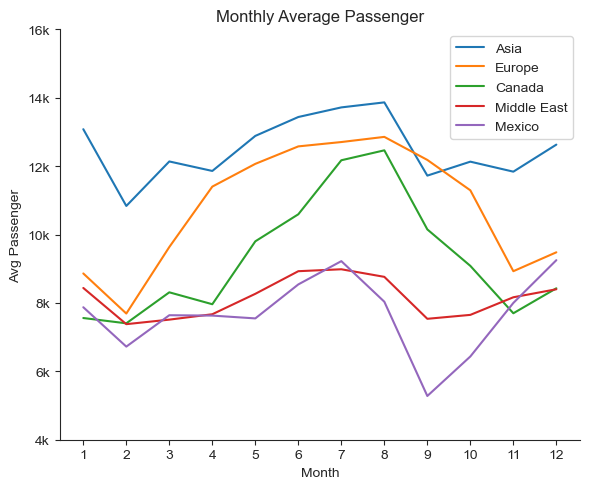

In [120]:
df_monthly_top.plot(title='Monthly Average Passenger', ylim=(4000,16000),figsize=(6,5))

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.legend(title='')
plt.ylabel('Avg Passenger')
plt.xlabel('Month')
plt.xticks(ticks=range(0,12),labels=range(1,13))
sns.despine()
plt.tight_layout()
plt.show()

Asia/ Middle East : have steady passenger count
Europe/ Canada : have more passenger during summer, in January, February low as 8k, in July, August high as 12k passenger
Mexico : is popular in December and lowest in September, presumably during the winter people tends to visit Mexico.